# Assignment 1 Notebook

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate

import seaborn as sns
sns.set()

Duplicate key in file '/Users/naziultalukder/.matplotlib/matplotlibrc', line 2 ('backend: PyQt5')
Duplicate key in file '/Users/naziultalukder/.matplotlib/matplotlibrc', line 3 ('backend: TkAgg')


In [2]:
heart_data = pd.read_csv('heart.csv')

In [3]:
X = heart_data.drop(['output'], axis=1)
y = heart_data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train_main, X_validation, y_train_main, y_validation = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

## Heart Disease Dataset Analysis

In [4]:
def generate_scores(clf, iter_min, iter_max, weight = 'uniform', clf_args = None):
    
    acc_train = []
    acc_val = []
    
    for i in range(iter_min, iter_max):
        curr_clf = clf(n_neighbors = i, weights= weight)
        
        # train the model and predict over trained samples
        curr_clf.fit(X_train_main, y_train_main)
        y_pred_train = curr_clf.predict(X_train_main)
        
        # get scores over training data
        acc_training = accuracy_score(y_train_main, y_pred_train)
        acc_train.append(acc_training)
        
        # predict over validation samples
        y_pred_val = curr_clf.predict(X_validation)
        acc_validation = accuracy_score(y_validation, y_pred_val)
        acc_val.append(acc_validation)
        
        
    return acc_train, acc_val

In [5]:
def tune_knn_neighbors(lower_lim, higher_lim):
    x_axis = [i for i in range(lower_lim, higher_lim)]
    
    acc_train_uni, acc_val_uni = generate_scores(KNeighborsClassifier, lower_lim, higher_lim)
    
    data_uni = {'x_axis': x_axis, 'acc_train': acc_train_uni, 'acc_val': acc_val_uni}
    
    acc_train_dist, acc_val_dist = generate_scores(KNeighborsClassifier, lower_lim, higher_lim, weight = 'distance')

    data_dist = {'x_axis': x_axis, 'acc_train': acc_train_dist, 'acc_val': acc_val_dist}

    
    accuracy_df_uni = pd.DataFrame.from_dict(data_uni)
    accuracy_df_dist = pd.DataFrame.from_dict(data_dist)

    # accuracy_df = accuracy_df.set_index('x_axis')

    return accuracy_df_uni, accuracy_df_dist

### KNN

In [6]:
def knn_plotting_func(accuracy_df_uni, accuracy_df_dist):

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))


    sns.scatterplot(ax=ax1, data = accuracy_df_uni, x='x_axis', y='acc_train')
    sns.scatterplot(ax=ax1, data = accuracy_df_uni, x='x_axis', y='acc_val')

    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('Neighbors')
    ax1.set_title('Uniform weights')
    ax1.legend(labels=['Training', 'Validation'])



    sns.scatterplot(ax= ax2, data = accuracy_df_dist, x='x_axis', y='acc_train')
    sns.scatterplot(ax=ax2, data = accuracy_df_dist, x='x_axis', y='acc_val')

    # axs2.set_ylabel('Accuracy Score')
    ax2.set_xlabel('Neighbors')
    ax2.set_title('Distance weights')
    ax2.legend(labels=['Training', 'Validation'])

    
    fig.suptitle('Varying weights and neighbors in KNN')



In [7]:
def compare_knn():
    uni_df, dist_df  = tune_knn_neighbors(1,25)
    knn_plotting_func(uni_df, dist_df)
    

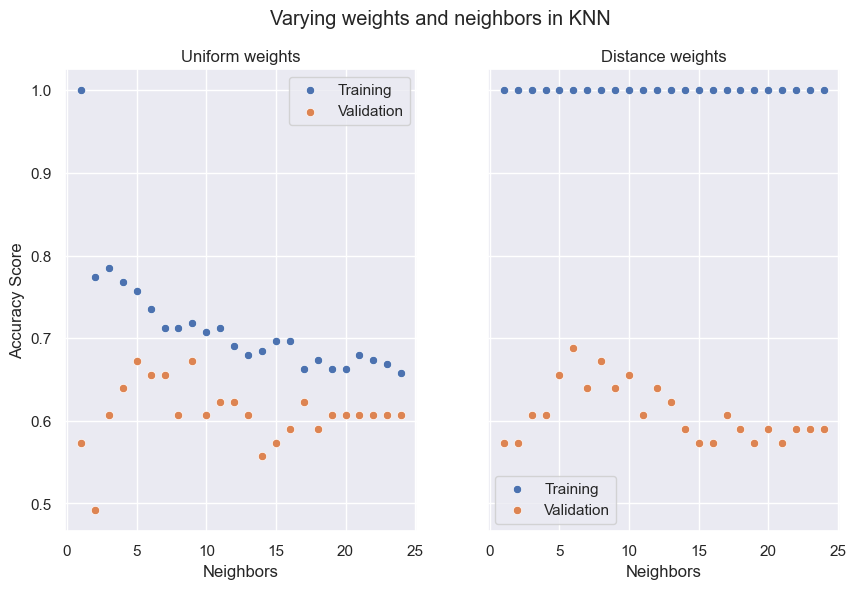

In [8]:
compare_knn()

### SVM

In [9]:
def svm_regularization(reg_vals, kernel='linear', degree = None):
    
    acc_train_svc = []
    acc_val_svc = []
    
    for reg in reg_vals:
        curr_svc = SVC(kernel = kernel, C = reg)
        
        # if degree:
        #     curr_svc = SVC(kernel = 'poly', degree = degree)
        # print("what is curr_svc ", curr_svc)

        curr_svc.fit(X_train_main, y_train_main)
        y_pred_train_svc = curr_svc.predict(X_train_main)

        acc_train_svc.append(accuracy_score(y_train_main, y_pred_train_svc))
        y_pred_val_svc = curr_svc.predict(X_validation)

        acc_val_svc.append(accuracy_score(y_validation, y_pred_val_svc))

    return acc_train_svc, acc_val_svc

In [10]:
def plot_svm_comparison(linear, poly, rbf, sigmoid, x):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,6))
    
    #plot linear
    sns.scatterplot(ax=ax1, x=x, y=linear[0])
    sns.scatterplot(ax=ax1, x=x, y=linear[1])
    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('C')
    ax1.set_title('Linear')
    ax1.legend(labels=['Training', 'Validation'])
    
    
    #plot poly
    sns.scatterplot(ax=ax2, x=x, y=poly[0])
    sns.scatterplot(ax=ax2, x=x, y=poly[1])
    
    # ax2.set_ylabel('Accuracy Score')
    ax2.set_xlabel('C')
    ax2.set_title('Poly')
    ax2.legend(labels=['Training', 'Validation'])
    
    
    
    #plot rbf
    sns.scatterplot(ax=ax3, x=x, y=rbf[0])
    sns.scatterplot(ax=ax3, x=x, y=rbf[1])
    
    # ax3.set_ylabel('Accuracy Score')
    ax3.set_xlabel('C')
    ax3.set_title('RBF')
    ax3.legend(labels=['Training', 'Validation'])
    
    #plot sigmoid
    sns.scatterplot(ax=ax4, x=x, y=sigmoid[0])
    sns.scatterplot(ax=ax4, x=x, y=sigmoid[1])
    
    # ax4.set_ylabel('Accuracy Score')
    ax4.set_xlabel('C')
    ax4.set_title('Sigmoid')
    ax4.legend(labels=['Training', 'Validation'])
    
    fig.suptitle('Comparison of different Kernels and Regularization')

In [11]:
def svm_comparison():
    C_vals = np.linspace(0.001,2,4)
    

    svc_regularization_linear = svm_regularization(C_vals)
    svc_regularization_poly = svm_regularization(C_vals, 'poly')
    svc_regularization_rbf = svm_regularization(C_vals, 'rbf')
    svc_regularization_sigmoid = svm_regularization(C_vals, 'sigmoid')
    
    plot_svm_comparison(svc_regularization_linear, svc_regularization_poly, svc_regularization_rbf, svc_regularization_sigmoid, C_vals)

In [12]:
def svm_comparison():
    C_vals = np.linspace(0.001,2,40)
    

    svc_regularization_linear = svm_regularization(C_vals)
    svc_regularization_poly = svm_regularization(C_vals, 'poly')
    svc_regularization_rbf = svm_regularization(C_vals, 'rbf')
    svc_regularization_sigmoid = svm_regularization(C_vals, 'sigmoid')
    
    plot_svm_comparison(svc_regularization_linear, svc_regularization_poly, svc_regularization_rbf, svc_regularization_sigmoid, C_vals)

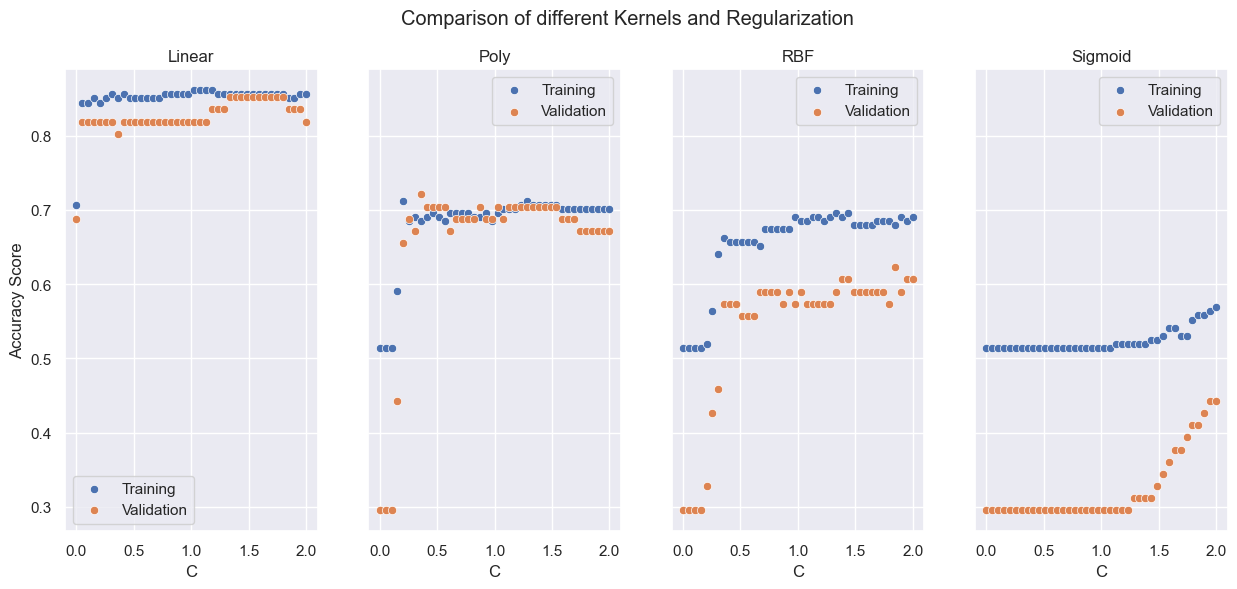

In [13]:
svm_comparison()

In [14]:
def plot_svm_poly_comparison(poly1, poly2, poly3, poly4, x):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,6))
    
    #plot linear
    sns.scatterplot(ax=ax1, x=x, y=poly1[0])
    sns.scatterplot(ax=ax1, x=x, y=poly1[1])
    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('C')
    ax1.set_title('Degree 2')
    ax1.legend(labels=['Training', 'Validation'])
    
    
    #plot poly
    sns.scatterplot(ax=ax2, x=x, y=poly2[0])
    sns.scatterplot(ax=ax2, x=x, y=poly2[1])
    
    # ax2.set_ylabel('Accuracy Score')
    ax2.set_xlabel('C')
    ax2.set_title('Degree 4')
    ax2.legend(labels=['Training', 'Validation'])
    
    
    
    #plot rbf
    sns.scatterplot(ax=ax3, x=x, y=poly3[0])
    sns.scatterplot(ax=ax3, x=x, y=poly3[1])
    
    # ax3.set_ylabel('Accuracy Score')
    ax3.set_xlabel('C')
    ax3.set_title('Degree 5')
    ax3.legend(labels=['Training', 'Validation'])
    
    #plot sigmoid
    sns.scatterplot(ax=ax4, x=x, y=poly4[0])
    sns.scatterplot(ax=ax4, x=x, y=poly4[1])
    
    # ax4.set_ylabel('Accuracy Score')
    ax4.set_xlabel('C')
    ax4.set_title('Degree 6')
    ax4.legend(labels=['Training', 'Validation'])
    
    fig.suptitle('Comparison of different polynomial kernels and Regularization')

In [15]:
def svm_poly(C_vals, degree):
        
    acc_train_svc = []
    acc_val_svc = []
    
    for reg in C_vals:
        curr_svc = SVC(kernel = 'poly' , C = reg, degree = degree)

        curr_svc.fit(X_train_main, y_train_main)
        y_pred_train_svc = curr_svc.predict(X_train_main)

        acc_train_svc.append(accuracy_score(y_train_main, y_pred_train_svc))
        y_pred_val_svc = curr_svc.predict(X_validation)

        acc_val_svc.append(accuracy_score(y_validation, y_pred_val_svc))

    return acc_train_svc, acc_val_svc
    
    

In [16]:
def svm_poly_comparison():
    C_vals = np.linspace(0.001,2,40)
    svc_poly_2 = svm_poly(C_vals, degree = 2)
    svc_poly_4 = svm_poly(C_vals, degree = 3)
    svc_poly_5 = svm_poly(C_vals, degree = 5)
    svc_poly_6 = svm_poly(C_vals, degree = 6)


    plot_svm_poly_comparison(svc_poly_2, svc_poly_4, svc_poly_5, svc_poly_6, C_vals)
    

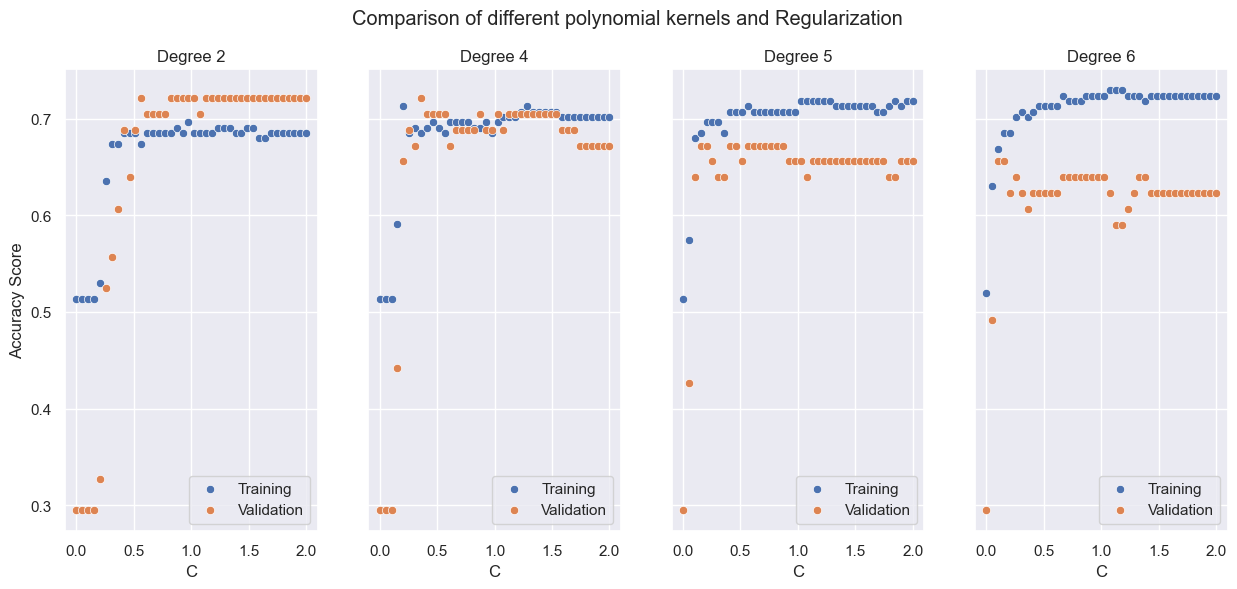

In [17]:
svm_poly_comparison()

### Neural Network

In [18]:
def get_scores_nn(args):
    neur_net = MLPClassifier(**args)
    neur_net.fit(X_train_main, y_train_main)
    y_pred_train_neu = neur_net.predict(X_train_main)
    acc_training_neu = accuracy_score(y_train_main, y_pred_train_neu)
    
    

    y_pred_val_neu = neur_net.predict(X_validation)
    acc_validation_neu = accuracy_score(y_validation, y_pred_val_neu)
    acc_validation_neu
    
    return acc_training_neu, acc_validation_neu  

In [19]:
def plot_nn_comp(train, test, x):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,6))
    
    #plot linear
    sns.scatterplot(ax=ax1, x=x, y=train[0])
    sns.scatterplot(ax=ax1, x=x, y=test[0])
    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('Solver')
    ax1.set_title('Identity')
    ax1.legend(labels=['Training', 'Validation'])
    
    
    #plot poly
    sns.scatterplot(ax=ax2, x=x, y=train[1])
    sns.scatterplot(ax=ax2, x=x, y=test[1])
    
    # ax2.set_ylabel('Accuracy Score')
    ax2.set_xlabel('Solver')
    ax2.set_title('Logistic')
    ax2.legend(labels=['Training', 'Validation'])
    
    
    
    #plot rbf
    sns.scatterplot(ax=ax3, x=x, y=train[2])
    sns.scatterplot(ax=ax3, x=x, y=test[2])
    
    # ax3.set_ylabel('Accuracy Score')
    ax3.set_xlabel('Solver')
    ax3.set_title('Tanh')
    ax3.legend(labels=['Training', 'Validation'])
    
    #plot sigmoid
    sns.scatterplot(ax=ax4, x=x, y=train[3])
    sns.scatterplot(ax=ax4, x=x, y=test[3])
    
    # ax4.set_ylabel('Accuracy Score')
    ax4.set_xlabel('Solver')
    ax4.set_title('Relu')
    ax4.legend(labels=['Training', 'Validation'])
    
    fig.suptitle('Comparison of different Activation Functions')

In [20]:
def nn_activ_comp():
    
    activation_funcs = ['identity', 'logistic', 'tanh', 'relu']
    solvers = ['lbfgs', 'sgd', 'adam']
    
    train_acc = [[], [], [], []]
    val_acc = [[], [], [], []]

    for i, activation in enumerate(activation_funcs):
        for solver in solvers:
            params = {
            "activation": activation,
            "solver": solver,
            "max_iter": 15000

            }
            train, val = get_scores_nn(params)
            train_acc[i].append(train)
            val_acc[i].append(val)

    plot_nn_comp(train_acc, val_acc, solvers)

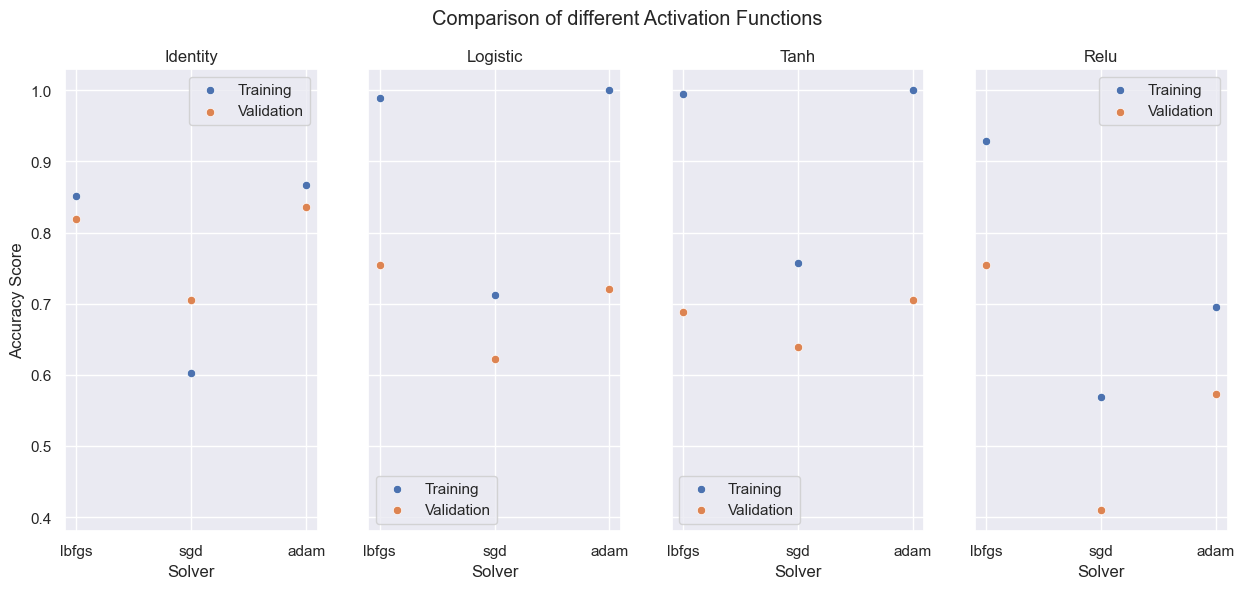

In [21]:
nn_activ_comp()

### Loss Curve

In [22]:
# import warnings
# warnings.filterwarnings("ignore")


def generate_loss():
    iters = np.linspace(1,500,10)
    train_acc = [[], []]
    val_acc = [[], []]

    for iteration in iters:
        params = {
                "activation": 'identity',
                "solver": 'lbfgs',
                "max_iter": int(iteration)
                }
        train, val = get_scores_nn(params)
        train_acc[0].append(train)
        val_acc[0].append(val)
        
        
    for iteration in iters:
        params = {
                "activation": 'identity',
                "solver": 'adam',
                "max_iter": int(iteration)
                }
        train, val = get_scores_nn(params)
        train_acc[1].append(train)
        val_acc[1].append(val)

    plot_nn_loss(train_acc, val_acc, iters)
    


In [23]:
def plot_nn_loss(train, test, x):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
    
    sns.scatterplot(ax=ax1, x=x, y=train[0])
    sns.scatterplot(ax=ax1, x=x, y=test[0])
    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('Max Iterations')
    ax1.set_title('lbfgs')
    ax1.legend(labels=['Training', 'Validation'])
    
    sns.scatterplot(ax=ax2, x=x, y=train[1])
    sns.scatterplot(ax=ax2, x=x, y=test[1])
    
    ax2.set_xlabel('Max Iterations')
    ax2.set_title('adam')
    ax2.legend(labels=['Training', 'Validation'])
    

/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_m

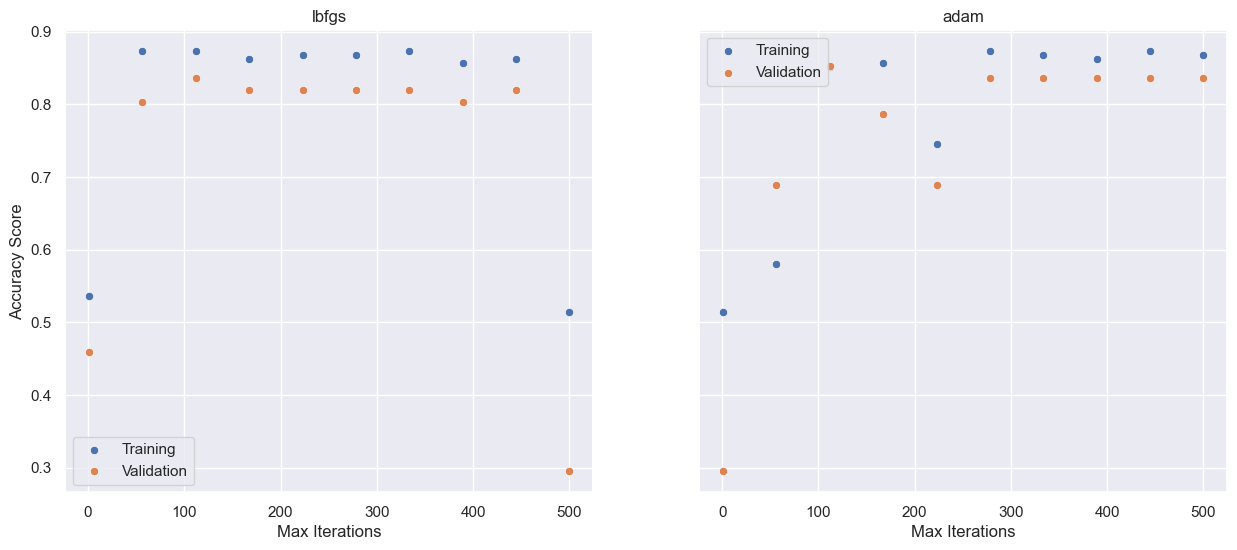

In [24]:
generate_loss()

### Decision Tree

In [25]:
def get_scores_dtree(args):
    
    dtree = DecisionTreeClassifier(**args)
    dtree.fit(X_train_main, y_train_main)
    y_pred_train_dtree = dtree.predict(X_train_main)
    acc_training_dtree = accuracy_score(y_train_main, y_pred_train_dtree)
    
    

    y_pred_val_dtree = dtree.predict(X_validation)
    acc_validation_dtree = accuracy_score(y_validation, y_pred_val_dtree)
    
    return acc_training_dtree, acc_validation_dtree   

In [26]:
def plot_dtree(train, test, x):
    fig, ax1 = plt.subplots(1, 1, sharey=True)

    
    #plot linear
    sns.scatterplot(ax=ax1, x=x, y=train[0])
    sns.lineplot(ax=ax1, x=x, y=train[0], label='Training')
    
    sns.scatterplot(ax=ax1, x=x, y=test[0])
    sns.lineplot(ax=ax1, x=x, y=test[0], label='Validation')

    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('Tree Depth')
    
    fig.suptitle('Accuracy Score varying tree depth')

In [27]:
def dtree_comparison():

    train_acc = [[], []]
    val_acc = [[], []]

    max_feat = ['sqrt', 'log2']
    depths = [i for i in range(1,20)]

    for i, el in enumerate(max_feat):
        for depth in depths:
            params = {
            "max_depth": depth,
            "max_features": el,
            "random_state": 42
            }
            train, val = get_scores_dtree(params)
            train_acc[i].append(train)
            val_acc[i].append(val)
            
    
    
    plot_dtree(train_acc, val_acc, depths)
        
        

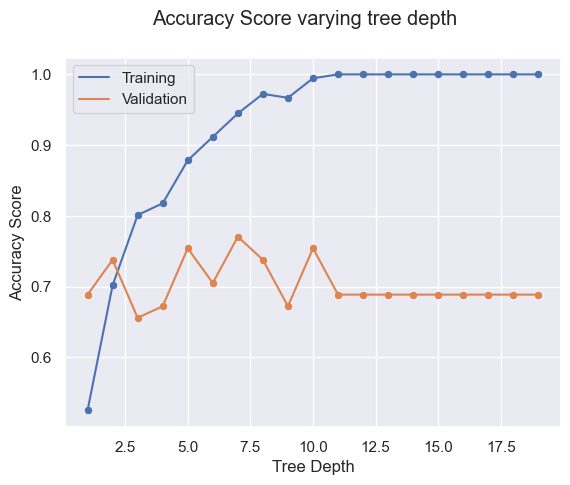

In [28]:
dtree_comparison()

### Boosting

In [29]:
def get_scores_boosting(estimator, depth):
    
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    clf = AdaBoostClassifier(n_estimators=estimator,
                         estimator=dtree)
    
    clf.fit(X_train_main, y_train_main)
    y_pred_train_dtree = clf.predict(X_train_main)
    acc_training_dtree = accuracy_score(y_train_main, y_pred_train_dtree)

    y_pred_val_dtree = clf.predict(X_validation)
    acc_validation_dtree = accuracy_score(y_validation, y_pred_val_dtree)
    
    return acc_training_dtree, acc_validation_dtree   

In [30]:
def plot_boosted_trees(train, test, x):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,6))
    
    sns.scatterplot(ax=ax1, x=x, y=train[0])
    sns.scatterplot(ax=ax1, x=x, y=test[0])
    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('Estimators')
    ax1.set_title('Tree Depth 1')
    ax1.legend(labels=['Training', 'Validation'])
    
    sns.scatterplot(ax=ax2, x=x, y=train[1])
    sns.scatterplot(ax=ax2, x=x, y=test[1])
    
    ax2.set_xlabel('Estimators')
    ax2.set_title('Tree Depth 2')
    ax2.legend(labels=['Training', 'Validation'])
    
    sns.scatterplot(ax=ax3, x=x, y=train[2])
    sns.scatterplot(ax=ax3, x=x, y=test[2])
    
    ax3.set_xlabel('Estimators')
    ax3.set_title('Tree Depth 3')
    ax3.legend(labels=['Training', 'Validation'])

In [31]:
def get_boosted_comp():
    train_arr = [[], [], []]
    test_arr = [[], [], []]
    
    estimators = [i for i in range(1,15)]
    for depth in range(1,4):
        for estimator in estimators:
            train, test = get_scores_boosting(estimator, depth)
            train_arr[depth-1].append(train)
            test_arr[depth-1].append(test)
    
    
    plot_boosted_trees(train_arr, test_arr, estimators)

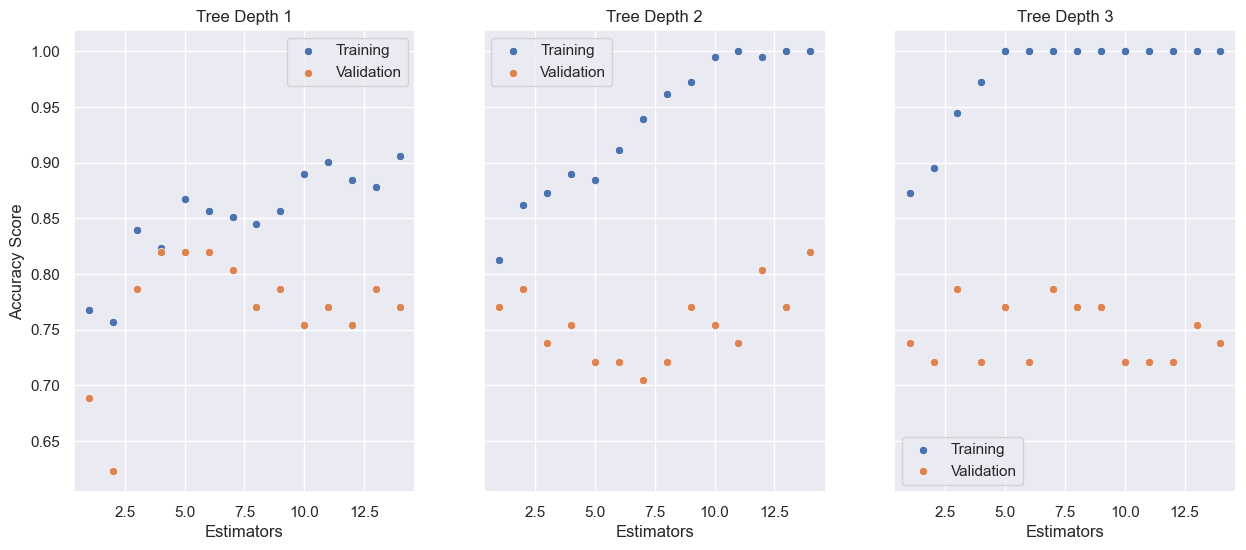

In [32]:
get_boosted_comp()

### Learning Curve

In [33]:
def learning_curve():
    svc = SVC(kernel="linear", C=1.4874)
    knn = KNeighborsClassifier(n_neighbors=9)
    decision_tree = DecisionTreeClassifier(random_state=42, max_depth=7)

    decision_tree_boost = DecisionTreeClassifier(random_state=42, max_depth=1)


    neur_net = MLPClassifier(activation = 'identity', solver='lbfgs')

    boosted_tree = AdaBoostClassifier(n_estimators=4,
                             estimator=decision_tree_boost)



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 6), sharey=True)

    common_params = {
        "X": X_train,
        "y": y_train,
        "train_sizes": np.linspace(0.1, 1.0, 10),
        "cv": ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
        "score_type": "both",
        "n_jobs": 4,
        "line_kw": {"marker": "o"},
        "std_display_style": "fill_between",
        "score_name": "Accuracy",
    }


    for ax_idx, estimator in enumerate([svc, knn, decision_tree, boosted_tree, neur_net]):
        LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
        handles, label = ax[ax_idx].get_legend_handles_labels()
        ax[ax_idx].legend(handles[:2], ["Training Score", "Validation Score"])
        ax[ax_idx].set_title(f"{estimator.__class__.__name__}")
        ax[ax_idx].set_xlabel('Sample size')


/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_per

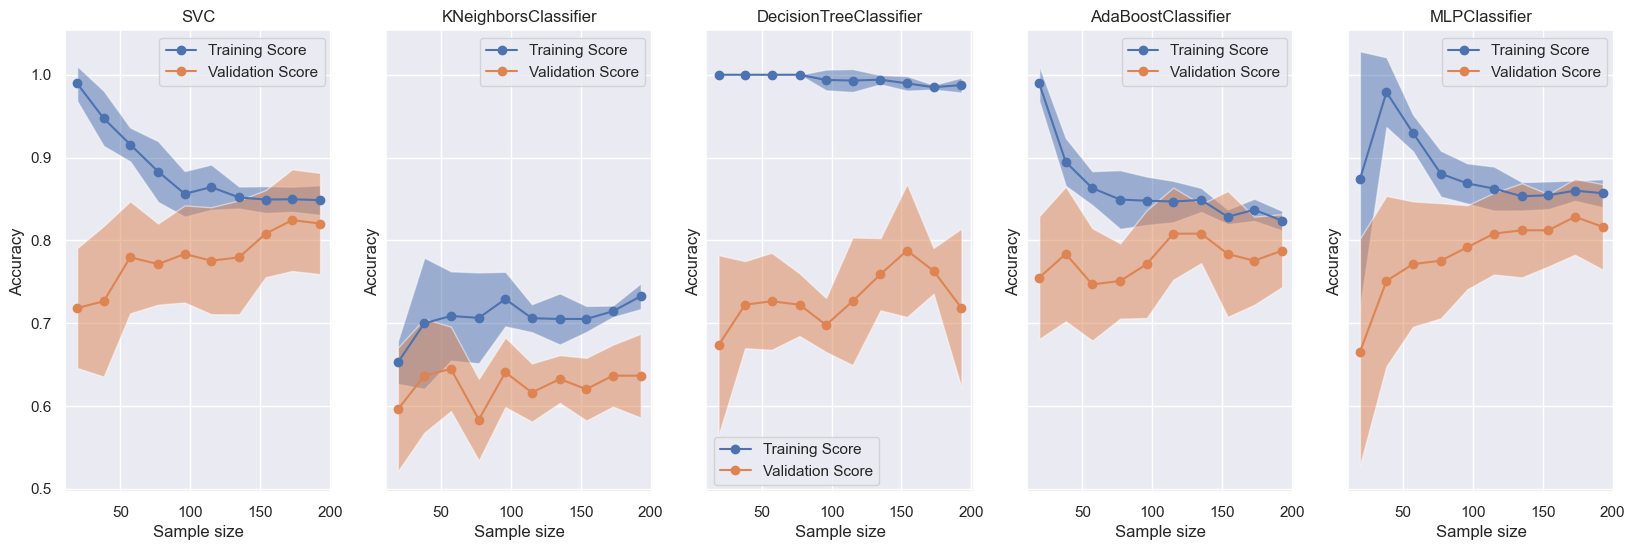

In [34]:
learning_curve()

### Time Comparison

In [35]:
def plot_time_comparison(fit_time, fit_time_high, fit_time_low, score_time, score_time_high, score_time_low, x):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    
    sns.scatterplot(ax=ax1, x=x, y=fit_time)
    sns.lineplot(ax=ax1, x=x, y=fit_time)
    ax1.fill_between(x, fit_time_low, fit_time_high, alpha=0.1, color='blue')
    ax1.set_xlabel('Algorithm')
    ax1.set_ylabel('Time (s)')
    ax1.set_title('Training Time')
    
    sns.scatterplot(ax=ax2, x=x, y=score_time)
    sns.lineplot(ax=ax2, x=x, y=score_time)
    ax2.fill_between(x, score_time_low, score_time_high, alpha=0.1, color='blue')
    ax2.set_xlabel('Algorithm')
    ax2.set_ylabel('Time (s)')
    ax2.set_title('Scoring Time')


/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_m

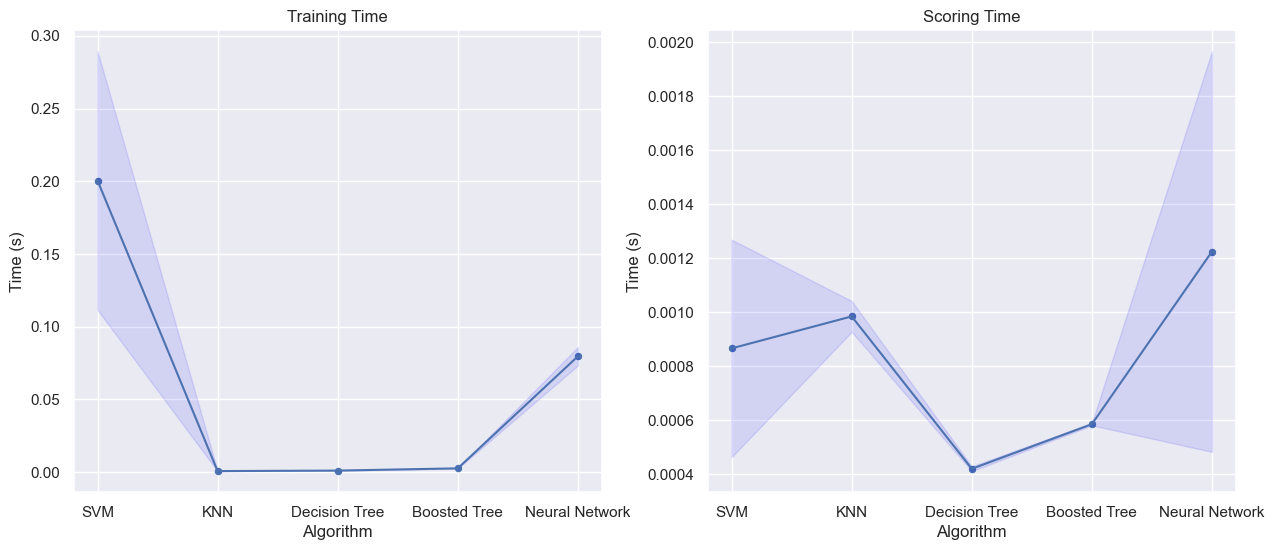

In [36]:
fit_time = []
fit_time_high = []
fit_time_low = []

score_time = []
score_time_high = []
score_time_low = []

algorithms = ["SVM", "KNN", "Decision Tree", "Boosted Tree", "Neural Network"]

svc = SVC(kernel="linear", C=1.4874)
knn = KNeighborsClassifier(n_neighbors=9)
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=7)

decision_tree_boost = DecisionTreeClassifier(random_state=42, max_depth=1)


neur_net = MLPClassifier(activation = 'identity', solver='lbfgs')

boosted_tree = AdaBoostClassifier(n_estimators=4,
                         estimator=decision_tree_boost)



cv_results = cross_validate(svc, X_train, y_train, cv=5)
fit_time.append(cv_results['fit_time'].mean())
fit_time_high.append(cv_results['fit_time'].mean() + cv_results['fit_time'].std())
fit_time_low.append(cv_results['fit_time'].mean() - cv_results['fit_time'].std())

score_time.append(cv_results['score_time'].mean())
score_time_high.append(cv_results['score_time'].mean() + cv_results['score_time'].std())
score_time_low.append(cv_results['score_time'].mean() - cv_results['score_time'].std())


cv_results = cross_validate(knn, X_train, y_train, cv=5)
fit_time.append(cv_results['fit_time'].mean())
fit_time_high.append(cv_results['fit_time'].mean() + cv_results['fit_time'].std())
fit_time_low.append(cv_results['fit_time'].mean() - cv_results['fit_time'].std())

score_time.append(cv_results['score_time'].mean())
score_time_high.append(cv_results['score_time'].mean() + cv_results['score_time'].std())
score_time_low.append(cv_results['score_time'].mean() - cv_results['score_time'].std())


cv_results = cross_validate(decision_tree, X_train, y_train, cv=5)
fit_time.append(cv_results['fit_time'].mean())
fit_time_high.append(cv_results['fit_time'].mean() + cv_results['fit_time'].std())
fit_time_low.append(cv_results['fit_time'].mean() - cv_results['fit_time'].std())

score_time.append(cv_results['score_time'].mean())
score_time_high.append(cv_results['score_time'].mean() + cv_results['score_time'].std())
score_time_low.append(cv_results['score_time'].mean() - cv_results['score_time'].std())


cv_results = cross_validate(boosted_tree, X_train, y_train, cv=5)
fit_time.append(cv_results['fit_time'].mean())
fit_time_high.append(cv_results['fit_time'].mean() + cv_results['fit_time'].std())
fit_time_low.append(cv_results['fit_time'].mean() - cv_results['fit_time'].std())

score_time.append(cv_results['score_time'].mean())
score_time_high.append(cv_results['score_time'].mean() + cv_results['score_time'].std())
score_time_low.append(cv_results['score_time'].mean() - cv_results['score_time'].std())


cv_results = cross_validate(neur_net, X_train, y_train, cv=5)
fit_time.append(cv_results['fit_time'].mean())
fit_time_high.append(cv_results['fit_time'].mean() + cv_results['fit_time'].std())
fit_time_low.append(cv_results['fit_time'].mean() - cv_results['fit_time'].std())

score_time.append(cv_results['score_time'].mean())
score_time_high.append(cv_results['score_time'].mean() + cv_results['score_time'].std())
score_time_low.append(cv_results['score_time'].mean() - cv_results['score_time'].std())


plot_time_comparison(fit_time, fit_time_high, fit_time_low, score_time, score_time_high, score_time_low, algorithms)



In [37]:
def test_algs():
    train = [[], [], [], [], []]
    test = [[], [], [], [], []]
    
    algorithms = ["SVM", "KNN", "Decision Tree", "Boosted Tree", "Neural Network"]

    svc = SVC(kernel="linear", C=1.4874)
    knn = KNeighborsClassifier(n_neighbors=9)
    decision_tree = DecisionTreeClassifier(random_state=42, max_depth=7)

    decision_tree_boost = DecisionTreeClassifier(random_state=42, max_depth=1)


    neur_net = MLPClassifier(activation = 'identity', solver='lbfgs')

    boosted_tree = AdaBoostClassifier(n_estimators=4,
                             estimator=decision_tree_boost)

    algs = [svc, knn, decision_tree, boosted_tree, neur_net]
    
    for i, alg in enumerate(algs):
        train[i], test[i] = generate_scores(alg)
        
    plot_testing_algs(train, test, algorithms)




In [38]:
def generate_scores(curr_clf):
    curr_clf.fit(X_train, y_train)
    y_pred_train = curr_clf.predict(X_train)
    
    acc_training = accuracy_score(y_train, y_pred_train)
    
    y_pred_val = curr_clf.predict(X_test)
    acc_validation = accuracy_score(y_test, y_pred_val)

    return acc_training, acc_validation

In [39]:
def plot_testing_algs(train, test, x):
    ax1 = sns.scatterplot(x=x, y=train, label= 'Train')
    ax1 = sns.scatterplot(x=x, y=test, label = 'Test')
    ax1.set_xlabel('Algorithms')
    ax1.set_ylabel('Accuracy Score')
    ax1.set_title('Performance on test dataset')

/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


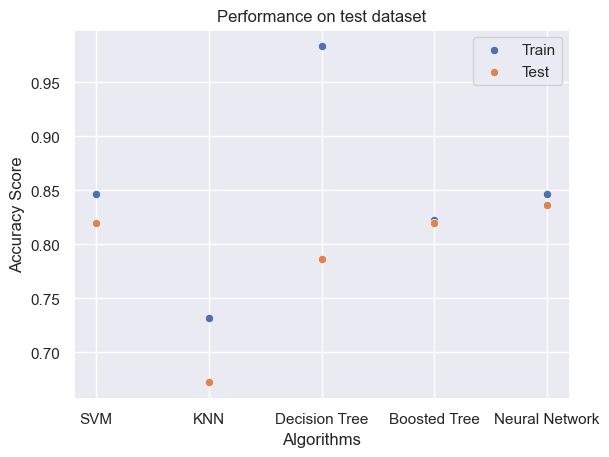

In [40]:
test_algs()

### Cancer Dataset

### Preprocessing

In [41]:
cancer_data = pd.read_csv('cancer_data.csv')

cancer_data.drop('id',axis=1,inplace=True)
cancer_data.drop('Unnamed: 32',axis=1,inplace=True)

cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1,'B':0})

In [42]:
X_canc = cancer_data.drop(['diagnosis'], axis=1)
y_canc = cancer_data['diagnosis']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_canc, y_canc, test_size=0.20, random_state=0)
X_train_main_c, X_validation_c, y_train_main_c, y_validation_c = \
train_test_split(X_train_c, y_train_c, test_size = 0.25, random_state = 0)

### KNN

In [43]:
def generate_scores_canc(clf, iter_min, iter_max, weight = 'uniform', clf_args = None):
    
    acc_train = []
    acc_val = []
    
    for i in range(iter_min, iter_max):
        curr_clf = clf(n_neighbors = i, weights= weight)
        
        # train the model and predict over trained samples
        curr_clf.fit(X_train_main_c, y_train_main_c)
        y_pred_train = curr_clf.predict(X_train_main_c)
        
        # get scores over training data
        acc_training = accuracy_score(y_train_main_c, y_pred_train)
        acc_train.append(acc_training)
        
        # predict over validation samples
        y_pred_val = curr_clf.predict(X_validation_c)
        acc_validation = accuracy_score(y_validation_c, y_pred_val)
        acc_val.append(acc_validation)
        
        
    return acc_train, acc_val

In [44]:
def tune_knn_neighbors_canc(lower_lim, higher_lim):
    x_axis = [i for i in range(lower_lim, higher_lim)]
    
    acc_train_uni, acc_val_uni = generate_scores_canc(KNeighborsClassifier, lower_lim, higher_lim)
    
    data_uni = {'x_axis': x_axis, 'acc_train': acc_train_uni, 'acc_val': acc_val_uni}
    
    acc_train_dist, acc_val_dist = generate_scores_canc(KNeighborsClassifier, lower_lim, higher_lim, weight = 'distance')

    data_dist = {'x_axis': x_axis, 'acc_train': acc_train_dist, 'acc_val': acc_val_dist}

    
    accuracy_df_uni = pd.DataFrame.from_dict(data_uni)
    accuracy_df_dist = pd.DataFrame.from_dict(data_dist)

    # accuracy_df = accuracy_df.set_index('x_axis')

    return accuracy_df_uni, accuracy_df_dist

In [45]:
def knn_plotting_func_canc(accuracy_df_uni, accuracy_df_dist):

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))


    sns.lineplot(ax=ax1, data = accuracy_df_uni, x='x_axis', y='acc_train', label='Training')
    sns.lineplot(ax=ax1, data = accuracy_df_uni, x='x_axis', y='acc_val', label='Validation')

    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('Neighbors')
    ax1.set_title('Uniform weights')



    sns.lineplot(ax= ax2, data = accuracy_df_dist, x='x_axis', y='acc_train', label='Training')
    sns.lineplot(ax=ax2, data = accuracy_df_dist, x='x_axis', y='acc_val', label='Validation')

    # axs2.set_ylabel('Accuracy Score')
    ax2.set_xlabel('Neighbors')
    ax2.set_title('Distance weights')

    
    fig.suptitle('Varying weights and neighbors in KNN')

In [46]:
def compare_knn_canc():
    uni_df, dist_df  = tune_knn_neighbors_canc(1,15)
    knn_plotting_func_canc(uni_df, dist_df)
    

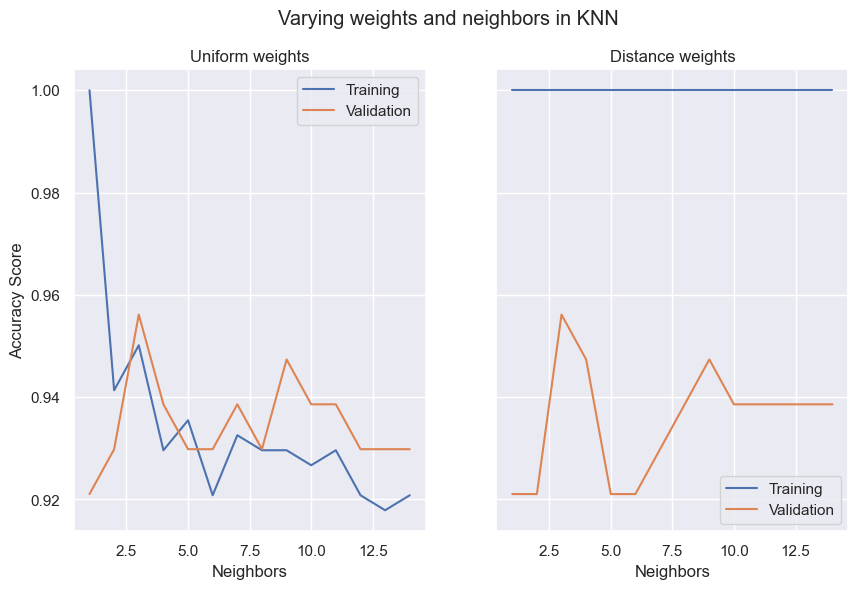

In [47]:
compare_knn_canc()

### SVM 

In [48]:
def svm_regularization_c(reg_vals, kernel='linear', degree = None):
    
    acc_train_svc = []
    acc_val_svc = []
    
    for reg in reg_vals:
        curr_svc = SVC(kernel = kernel, C = reg)
        
        # if degree:
        #     curr_svc = SVC(kernel = 'poly', degree = degree)
        # print("what is curr_svc ", curr_svc)

        curr_svc.fit(X_train_main_c, y_train_main_c)
        y_pred_train_svc = curr_svc.predict(X_train_main_c)

        acc_train_svc.append(accuracy_score(y_train_main_c, y_pred_train_svc))
        y_pred_val_svc = curr_svc.predict(X_validation_c)

        acc_val_svc.append(accuracy_score(y_validation_c, y_pred_val_svc))

    return acc_train_svc, acc_val_svc

In [49]:
def plot_svm_comparison_c(linear, poly, rbf, sigmoid, x):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,6))
    
    #plot linear
    sns.scatterplot(ax=ax1, x=x, y=linear[0])
    sns.scatterplot(ax=ax1, x=x, y=linear[1])
    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('C')
    ax1.set_title('Linear')
    ax1.legend(labels=['Training', 'Validation'])
    
    
    #plot poly
    sns.scatterplot(ax=ax2, x=x, y=poly[0])
    sns.scatterplot(ax=ax2, x=x, y=poly[1])
    
    # ax2.set_ylabel('Accuracy Score')
    ax2.set_xlabel('C')
    ax2.set_title('Poly')
    ax2.legend(labels=['Training', 'Validation'])
    
    
    
    #plot rbf
    sns.scatterplot(ax=ax3, x=x, y=rbf[0])
    sns.scatterplot(ax=ax3, x=x, y=rbf[1])
    
    # ax3.set_ylabel('Accuracy Score')
    ax3.set_xlabel('C')
    ax3.set_title('RBF')
    ax3.legend(labels=['Training', 'Validation'])
    
    #plot sigmoid
    sns.scatterplot(ax=ax4, x=x, y=sigmoid[0])
    sns.scatterplot(ax=ax4, x=x, y=sigmoid[1])
    
    # ax4.set_ylabel('Accuracy Score')
    ax4.set_xlabel('C')
    ax4.set_title('Sigmoid')
    ax4.legend(labels=['Training', 'Validation'])
    
    fig.suptitle('Comparison of different Kernels and Regularization')

In [50]:
def svm_comparison_c():
    C_vals = np.linspace(0.001,2,50)
    

    svc_regularization_linear = svm_regularization_c(C_vals)
    svc_regularization_poly = svm_regularization_c(C_vals, 'poly')
    svc_regularization_rbf = svm_regularization_c(C_vals, 'rbf')
    svc_regularization_sigmoid = svm_regularization_c(C_vals, 'sigmoid')
    
    plot_svm_comparison_c(svc_regularization_linear, svc_regularization_poly, svc_regularization_rbf, svc_regularization_sigmoid, C_vals)

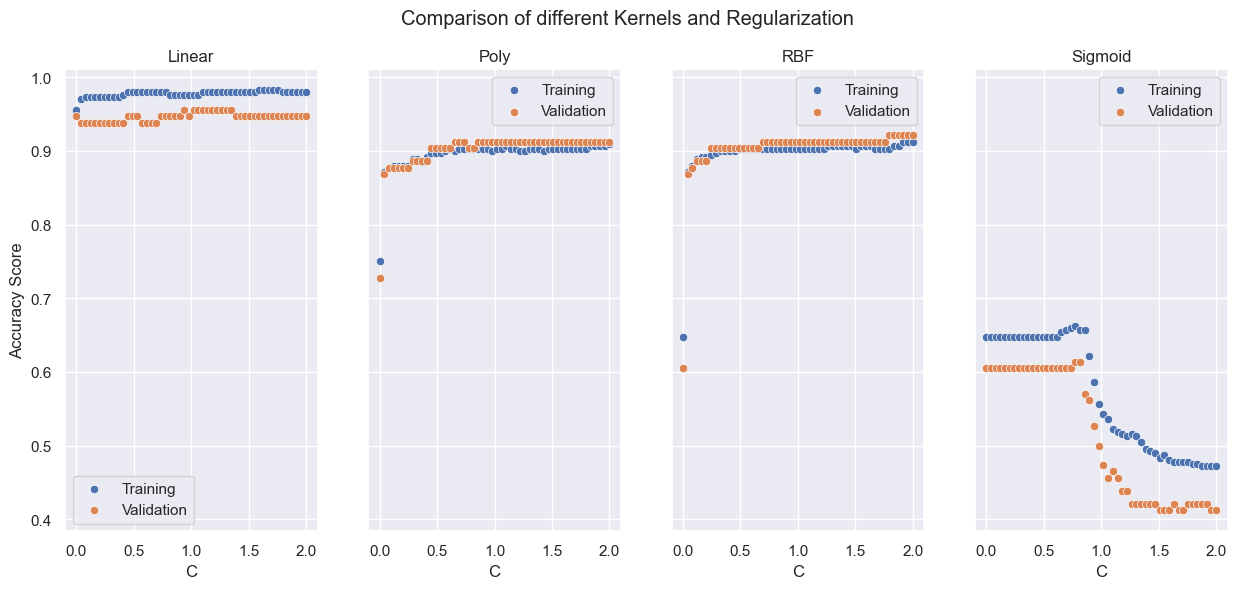

In [51]:
svm_comparison_c()

### Boosting

In [52]:
from sklearn.ensemble import AdaBoostClassifier


def get_scores_boosting_c(estimator, depth):
    
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    clf = AdaBoostClassifier(n_estimators=estimator,
                         estimator=dtree)
    
    clf.fit(X_train_main_c, y_train_main_c)
    y_pred_train_dtree = clf.predict(X_train_main_c)
    acc_training_dtree = accuracy_score(y_train_main_c, y_pred_train_dtree)
    
    

    y_pred_val_dtree = clf.predict(X_validation_c)
    acc_validation_dtree = accuracy_score(y_validation_c, y_pred_val_dtree)
    
    
    return acc_training_dtree, acc_validation_dtree   

In [53]:
def plot_boosted_trees_c(train, test, x):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,6))
    
    sns.scatterplot(ax=ax1, x=x, y=train[0])
    sns.scatterplot(ax=ax1, x=x, y=test[0])
    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('Estimators')
    ax1.set_title('Tree Depth 1')
    ax1.legend(labels=['Training', 'Validation'])
    
    sns.scatterplot(ax=ax2, x=x, y=train[1])
    sns.scatterplot(ax=ax2, x=x, y=test[1])
    
    ax2.set_xlabel('Estimators')
    ax2.set_title('Tree Depth 2')
    ax2.legend(labels=['Training', 'Validation'])
    
    sns.scatterplot(ax=ax3, x=x, y=train[2])
    sns.scatterplot(ax=ax3, x=x, y=test[2])
    
    ax3.set_xlabel('Estimators')
    ax3.set_title('Tree Depth 3')
    ax3.legend(labels=['Training', 'Validation'])
    

In [54]:
def get_boosted_comp_c():
    train_arr = [[], [], []]
    test_arr = [[], [], []]
    
    estimators = [i for i in range(1,20)]
    for depth in range(1,4):
        for estimator in estimators:
            train, test = get_scores_boosting_c(estimator, depth)
            train_arr[depth-1].append(train)
            test_arr[depth-1].append(test)
    
    
    plot_boosted_trees_c(train_arr, test_arr, estimators)

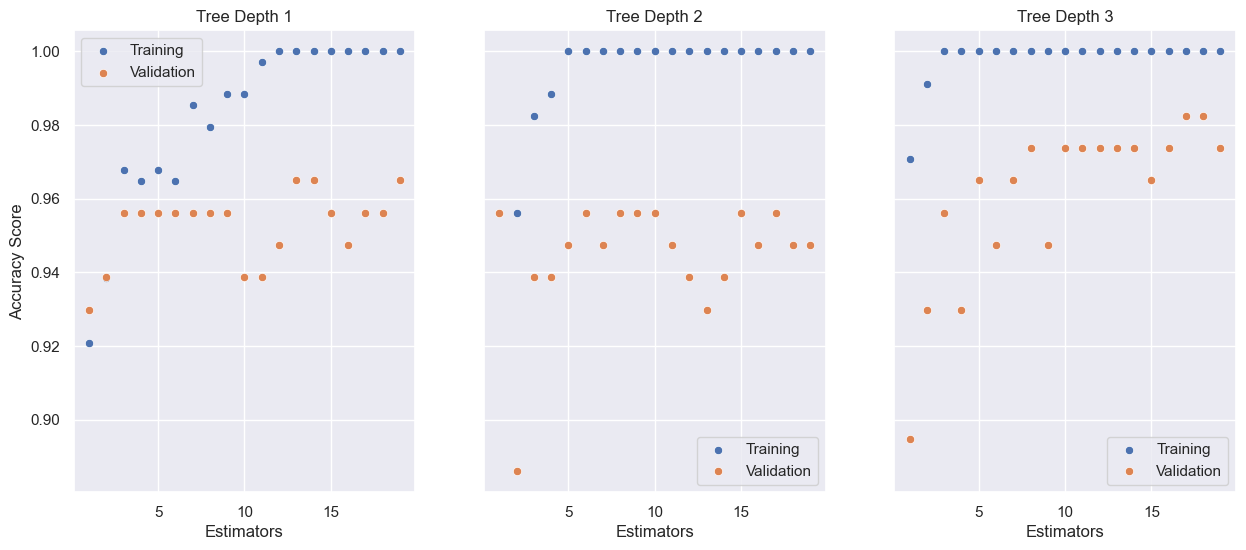

In [55]:
get_boosted_comp_c()

### Neural Network

In [56]:
def get_scores_nn_c(args):
    neur_net = MLPClassifier(**args)
    neur_net.fit(X_train_main_c, y_train_main_c)
    y_pred_train_neu = neur_net.predict(X_train_main_c)
    acc_training_neu = accuracy_score(y_train_main_c, y_pred_train_neu)
    
    

    y_pred_val_neu = neur_net.predict(X_validation_c)
    acc_validation_neu = accuracy_score(y_validation_c, y_pred_val_neu)
    acc_validation_neu
    
    return acc_training_neu, acc_validation_neu    

In [57]:
def nn_activ_comp_c():
    
    activation_funcs = ['identity', 'logistic', 'tanh', 'relu']
    solvers = ['lbfgs', 'sgd', 'adam']
    
    train_acc = [[], [], [], []]
    val_acc = [[], [], [], []]

    for i, activation in enumerate(activation_funcs):
        for solver in solvers:
            params = {
            "activation": activation,
            "solver": solver,
            "max_iter": 15000,
            "random_state": 42
            }
            train, val = get_scores_nn_c(params)
            train_acc[i].append(train)
            val_acc[i].append(val)

    plot_nn_comp(train_acc, val_acc, solvers)

/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


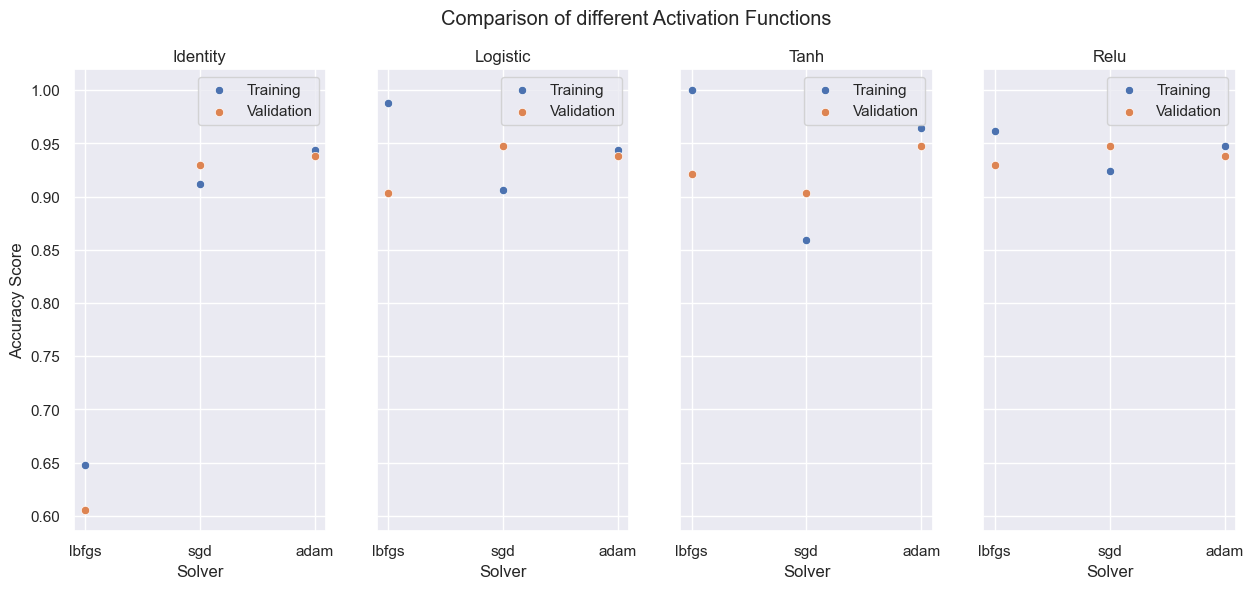

In [58]:
nn_activ_comp_c()

In [59]:
def generate_layers_plot_c(train, test, x):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
    
    #plot identity
    sns.scatterplot(ax=ax1, x=x, y=train[0])
    sns.scatterplot(ax=ax1, x=x, y=test[0])
    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('Hidden layer size')
    ax1.set_title('Identity')
    ax1.legend(labels=['Training', 'Validation'])
    
    
    #plot relu
    sns.scatterplot(ax=ax2, x=x, y=train[1])
    sns.scatterplot(ax=ax2, x=x, y=test[1])
    
    ax2.set_ylabel('Accuracy Score')
    ax2.set_xlabel('Hidden layer size')
    ax2.set_title('Relu')
    ax2.legend(labels=['Training', 'Validation'])    

In [60]:
def plot_layers_c():
    nums = np.linspace(1, 5, 5)

    train_acc = [[], []]
    val_acc = [[], []]

    # for i in range(5):
    for num in nums:
        params = {
        "activation": 'identity',
        "solver": 'lbfgs',
        "hidden_layer_sizes": (int(num),),
        "random_state": 42,
        }
        train, val = get_scores_nn_c(params)
        train_acc[0].append(train)
        val_acc[0].append(val)
        
    for num in nums:
        params = {
        "activation": 'relu',
        "solver": 'adam',
        "hidden_layer_sizes": (int(num),),
        "random_state": 42,
        }
        train, val = get_scores_nn_c(params)
        train_acc[1].append(train)
        val_acc[1].append(val)
    
    generate_layers_plot_c(train_acc, val_acc, nums)

/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_per

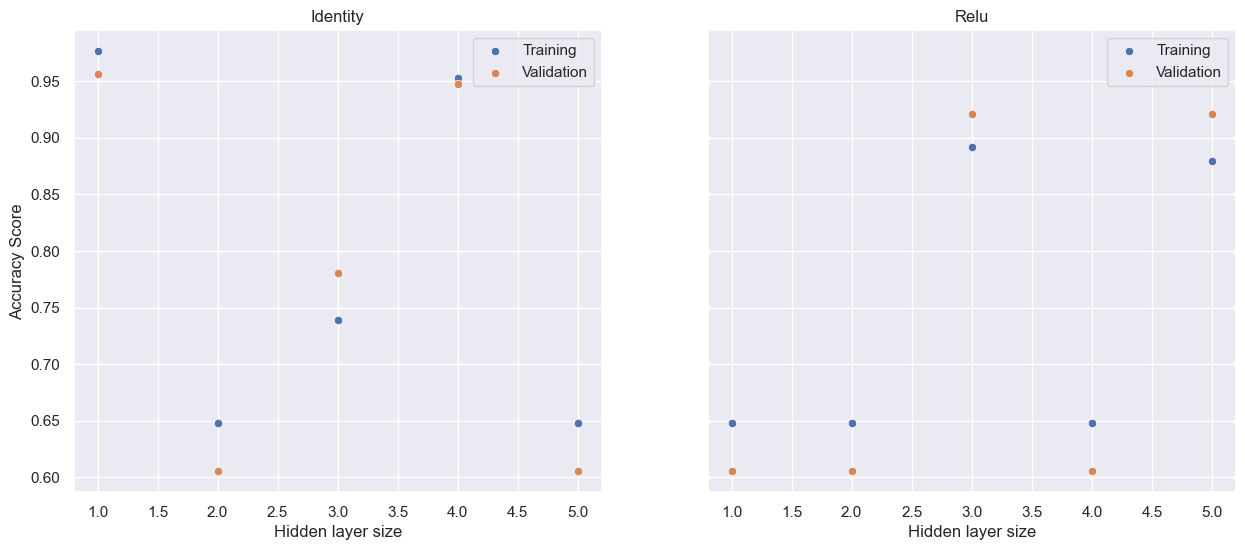

In [61]:
plot_layers_c()

In [62]:
def generate_loss_c():
    iters = np.linspace(1,500,10)
    train_acc = [[], []]
    val_acc = [[], []]

    for iteration in iters:
        params = {
                "activation": 'identity',
                "solver": 'lbfgs',
                "max_iter": int(iteration),
                "hidden_layer_sizes": (1,),
                "random_state": 42,
                }
        train, val = get_scores_nn_c(params)
        train_acc[0].append(train)
        val_acc[0].append(val)
        
        
    for iteration in iters:
        params = {
                "activation": 'relu',
                "solver": 'adam',
                "max_iter": int(iteration),
                "hidden_layer_sizes": (20,),
                "random_state": 42,
                }
        train, val = get_scores_nn_c(params)
        train_acc[1].append(train)
        val_acc[1].append(val)

    plot_nn_loss_c(train_acc, val_acc, iters)

In [63]:
def plot_nn_loss_c(train, test, x):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
    
    sns.scatterplot(ax=ax1, x=x, y=train[0])
    sns.scatterplot(ax=ax1, x=x, y=test[0])
    
    ax1.set_ylabel('Accuracy Score')
    ax1.set_xlabel('Max Iterations')
    ax1.set_title('Identity (lbfgs)')
    ax1.legend(labels=['Training', 'Validation'])
    
    sns.scatterplot(ax=ax2, x=x, y=train[1])
    sns.scatterplot(ax=ax2, x=x, y=test[1])
    
    ax2.set_xlabel('Max Iterations')
    ax2.set_title('Relu (adam)')
    ax2.legend(labels=['Training', 'Validation'])
    

/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_m

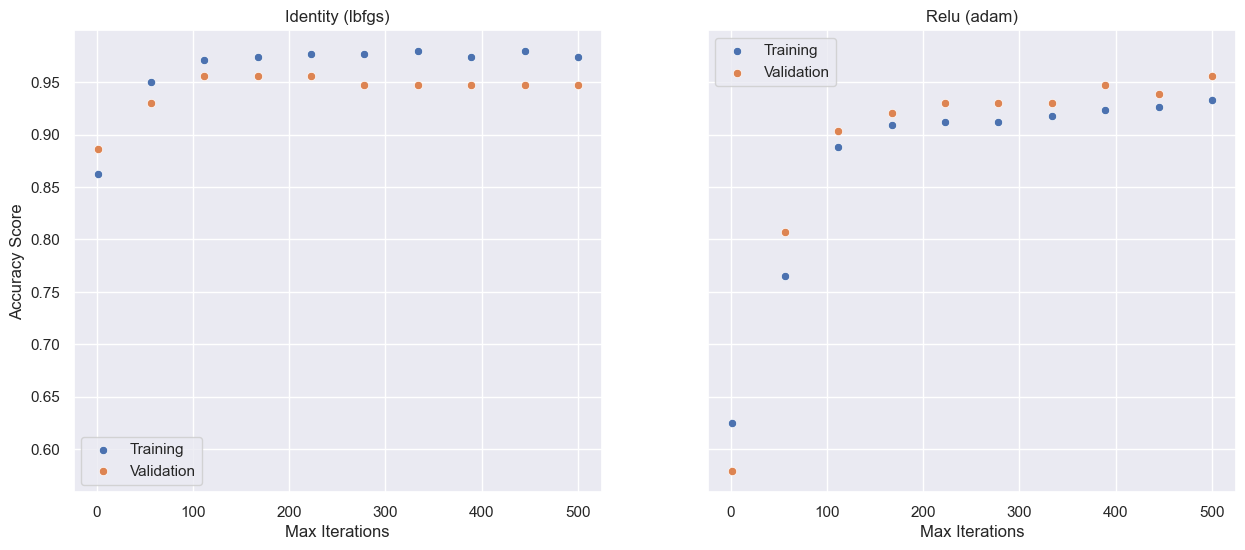

In [64]:
generate_loss_c()

### Learning Curve

In [65]:
def learning_curve_c():
    svc = SVC(kernel="linear", C=1.2)
    knn = KNeighborsClassifier(n_neighbors=9)
    decision_tree = DecisionTreeClassifier(random_state=42, max_depth=6)

    decision_tree_boost = DecisionTreeClassifier(random_state=42, max_depth=3)


    neur_net = MLPClassifier(activation = 'identity', solver='lbfgs', random_state=42, hidden_layer_sizes = (1,))

    boosted_tree = AdaBoostClassifier(n_estimators=17,
                             estimator=decision_tree_boost)
    
    
    heart_data = pd.read_csv('cancer_data.csv')

    heart_data.drop('id',axis=1,inplace=True)
    heart_data.drop('Unnamed: 32',axis=1,inplace=True)

    heart_data['diagnosis'] = heart_data['diagnosis'].map({'M':1,'B':0})
    
    y = heart_data['diagnosis']
    X = heart_data.drop(['diagnosis'], axis=1)



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 6), sharey=True)

    common_params = {
        "X": X_train,
        "y": y_train,
        "train_sizes": np.linspace(0.1, 1.0, 10),
        "cv": ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
        "score_type": "both",
        "n_jobs": 4,
        "line_kw": {"marker": "o"},
        "std_display_style": "fill_between",
        "score_name": "Accuracy",
    }


    for ax_idx, estimator in enumerate([svc, knn, decision_tree, boosted_tree, neur_net]):
        LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
        handles, label = ax[ax_idx].get_legend_handles_labels()
        ax[ax_idx].legend(handles[:2], ["Training Score", "Validation Score"])
        ax[ax_idx].set_title(f"{estimator.__class__.__name__}")
        ax[ax_idx].set_xlabel('Sample size')


/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_m

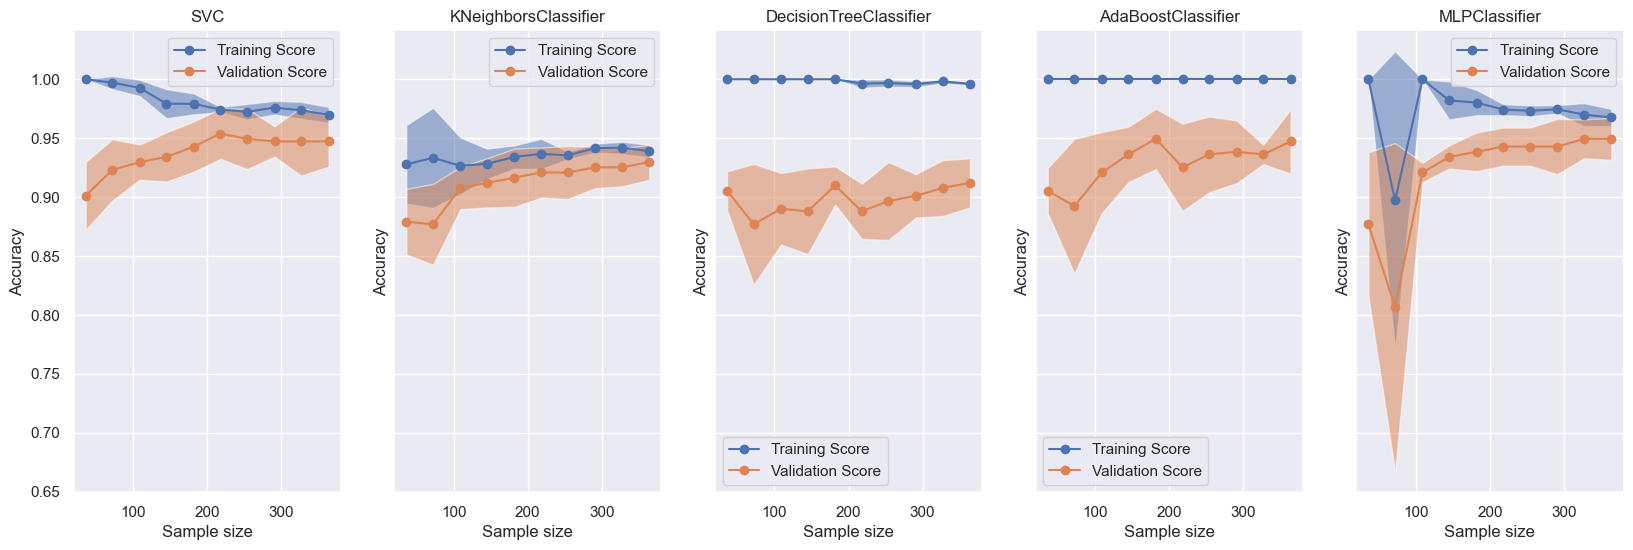

In [66]:
learning_curve_c()

### Time Comparison

/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_m

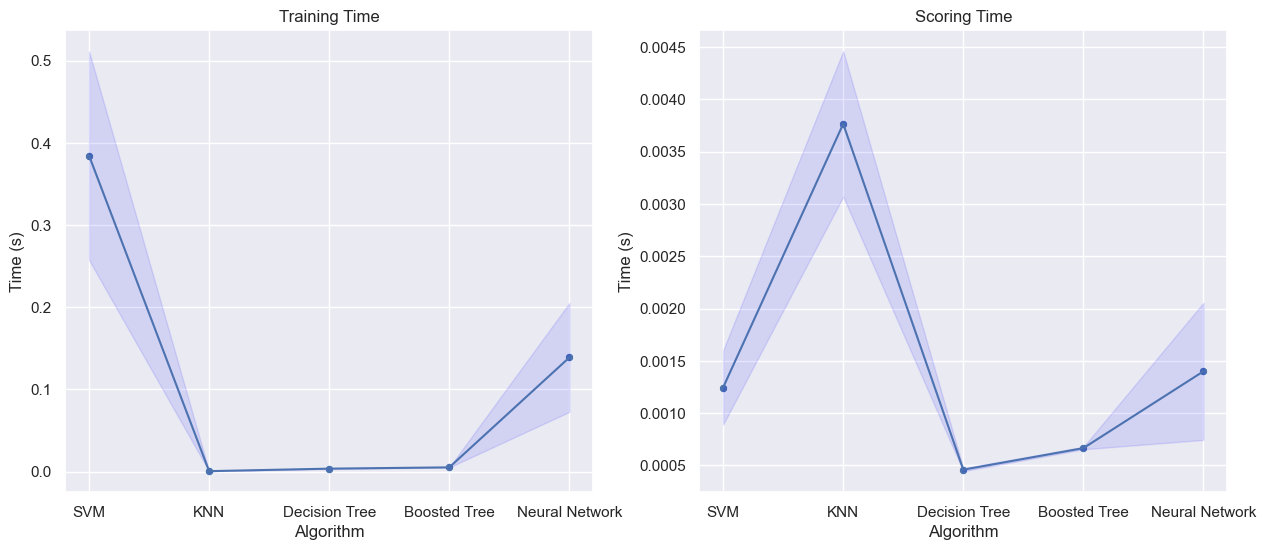

In [67]:
fit_time = []
fit_time_high = []
fit_time_low = []

score_time = []
score_time_high = []
score_time_low = []


heart_data = pd.read_csv('cancer_data.csv')

heart_data.drop('id',axis=1,inplace=True)
heart_data.drop('Unnamed: 32',axis=1,inplace=True)

heart_data['diagnosis'] = heart_data['diagnosis'].map({'M':1,'B':0})

y = heart_data['diagnosis']
X = heart_data.drop(['diagnosis'], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

algorithms = ["SVM", "KNN", "Decision Tree", "Boosted Tree", "Neural Network"]

svc = SVC(kernel="linear", C=1.4874)
knn = KNeighborsClassifier(n_neighbors=9)
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=7)

decision_tree_boost = DecisionTreeClassifier(random_state=42, max_depth=1)


neur_net = MLPClassifier(activation = 'identity', solver='lbfgs')

boosted_tree = AdaBoostClassifier(n_estimators=4,
                         estimator=decision_tree_boost)



cv_results = cross_validate(svc, X_train, y_train, cv=5)
fit_time.append(cv_results['fit_time'].mean())
fit_time_high.append(cv_results['fit_time'].mean() + cv_results['fit_time'].std())
fit_time_low.append(cv_results['fit_time'].mean() - cv_results['fit_time'].std())

score_time.append(cv_results['score_time'].mean())
score_time_high.append(cv_results['score_time'].mean() + cv_results['score_time'].std())
score_time_low.append(cv_results['score_time'].mean() - cv_results['score_time'].std())


cv_results = cross_validate(knn, X_train, y_train, cv=5)
fit_time.append(cv_results['fit_time'].mean())
fit_time_high.append(cv_results['fit_time'].mean() + cv_results['fit_time'].std())
fit_time_low.append(cv_results['fit_time'].mean() - cv_results['fit_time'].std())

score_time.append(cv_results['score_time'].mean())
score_time_high.append(cv_results['score_time'].mean() + cv_results['score_time'].std())
score_time_low.append(cv_results['score_time'].mean() - cv_results['score_time'].std())


cv_results = cross_validate(decision_tree, X_train, y_train, cv=5)
fit_time.append(cv_results['fit_time'].mean())
fit_time_high.append(cv_results['fit_time'].mean() + cv_results['fit_time'].std())
fit_time_low.append(cv_results['fit_time'].mean() - cv_results['fit_time'].std())

score_time.append(cv_results['score_time'].mean())
score_time_high.append(cv_results['score_time'].mean() + cv_results['score_time'].std())
score_time_low.append(cv_results['score_time'].mean() - cv_results['score_time'].std())


cv_results = cross_validate(boosted_tree, X_train, y_train, cv=5)
fit_time.append(cv_results['fit_time'].mean())
fit_time_high.append(cv_results['fit_time'].mean() + cv_results['fit_time'].std())
fit_time_low.append(cv_results['fit_time'].mean() - cv_results['fit_time'].std())

score_time.append(cv_results['score_time'].mean())
score_time_high.append(cv_results['score_time'].mean() + cv_results['score_time'].std())
score_time_low.append(cv_results['score_time'].mean() - cv_results['score_time'].std())


cv_results = cross_validate(neur_net, X_train, y_train, cv=5)
fit_time.append(cv_results['fit_time'].mean())
fit_time_high.append(cv_results['fit_time'].mean() + cv_results['fit_time'].std())
fit_time_low.append(cv_results['fit_time'].mean() - cv_results['fit_time'].std())

score_time.append(cv_results['score_time'].mean())
score_time_high.append(cv_results['score_time'].mean() + cv_results['score_time'].std())
score_time_low.append(cv_results['score_time'].mean() - cv_results['score_time'].std())


plot_time_comparison(fit_time, fit_time_high, fit_time_low, score_time, score_time_high, score_time_low, algorithms)


### Test Data Performance

In [68]:
def test_algs_c():
    
    heart_data = pd.read_csv('cancer_data.csv')

    heart_data.drop('id',axis=1,inplace=True)
    heart_data.drop('Unnamed: 32',axis=1,inplace=True)

    heart_data['diagnosis'] = heart_data['diagnosis'].map({'M':1,'B':0})

    y = heart_data['diagnosis']
    X = heart_data.drop(['diagnosis'], axis=1)



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

    train = [[], [], [], [], []]
    test = [[], [], [], [], []]
    
    algorithms = ["SVM", "KNN", "Decision Tree", "Boosted Tree", "Neural Network"]

    svc = SVC(kernel="linear", C=1.2)
    knn = KNeighborsClassifier(n_neighbors=9)
    decision_tree = DecisionTreeClassifier(random_state=42, max_depth=6)

    decision_tree_boost = DecisionTreeClassifier(random_state=42, max_depth=3)


    neur_net = MLPClassifier(activation = 'identity', solver='lbfgs', random_state=42, hidden_layer_sizes = (1,))

    boosted_tree = AdaBoostClassifier(n_estimators=17,
                             estimator=decision_tree_boost)

    algs = [svc, knn, decision_tree, boosted_tree, neur_net]
    
    for i, alg in enumerate(algs):
        train[i], test[i] = generate_scores(alg)
        
    plot_testing_algs(train, test, algorithms)




/Users/naziultalukder/miniconda3/envs/assignment1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


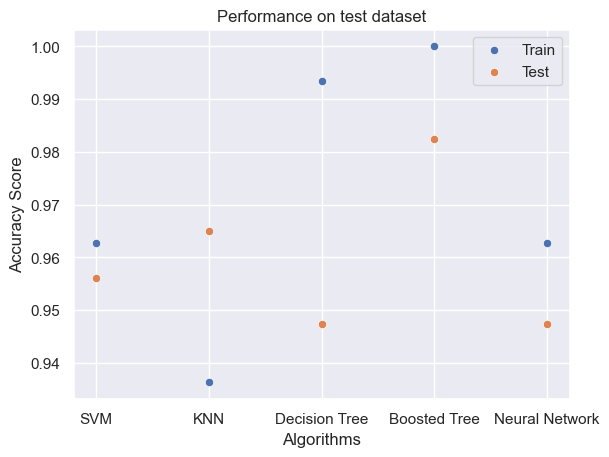

In [69]:
test_algs_c()